In [84]:
import os
import json
import random
import glob
from pathlib import Path
from ast import literal_eval

from pycocotools.coco import COCO

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
from PIL import Image

import numpy as np
import pandas as pd

In [211]:
def visualize_image(img_annos, cate_dict, image_id, image):
    
    plt.imshow(image)   # 이미지 열기
    ax = plt.gca()      # 그래프 축 가져오기

    # 이미지에 박스 그리기
    for img_anno in img_annos:
        x1 = img_anno['bbox'][0]
        y1 = img_anno['bbox'][1]
        w = img_anno['bbox'][2]
        h = img_anno['bbox'][3]

        # 직사각형 객체 생성
        rect = patches.Rectangle(
            (x1, y1),           # 왼쪽 하단 모서리 좌표
            w, h,               # 길이 및 높이
            linewidth=1,        # 테두리 두께
            edgecolor='green',  # 직사각형 테두리 색
            facecolor='none'    # 직사각형 내부 색
        )

        # 축에 rect 추가
        ax.add_patch(rect)
        ax.text(
            x1, y1,                 # 텍스트의 왼쪽 하단 모서리 좌표
            cate_dict[img_anno['category_id']],            # 텍스트 내용
            c='white',              # 텍스트 색상
            size=5,                 # 텍스트 크기
            path_effects=[pe.withStroke(linewidth=2, foreground='green')],  # 텍스트 효과
            family='sans-serif',    # 텍스트 폰트
            weight='semibold',      # 텍스트 굵기
            va='top', ha='left',    # 텍스트 정렬
            bbox=dict(              # 텍스트 주변 상자 설정
                boxstyle='round',   # 둥근 모서리
                ec='green',         # 테두리 색
                fc='green',         # 내부 색
            )
        )
    plt.axis('off')     # 축 제거
    plt.savefig(os.path.join("./examples/", f'{image_id}.jpg'), dpi=150, bbox_inches='tight', pad_inches=0)  # 이미지 파일 저장
    print(f"Work is Done & Save in examples/{image_id}.jpg")
    plt.clf()   # 활성된 figure 지우고 비우기

In [212]:
def makecategorydict(categories):
    cate_dict ={}
    for category in categories:
        cate_dict[category['id']] = category['name']

    return cate_dict

In [252]:
def image_open(img_ids, idx = 0):
    img_id = str(img_ids[idx]).zfill(12)
    image_path = os.path.join("./val2017/" + f"{img_id}.jpg")
    print(f"idx: {idx}, img_id: {img_id}.jpg")
    
    image = plt.imread(image_path)
    plt.axis('off')
    plt.imshow(image)
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

    return img_id, image

loading annotations into memory...
Done (t=0.69s)
creating index...
index created!
idx: 845, img_id: 000000181303.jpg


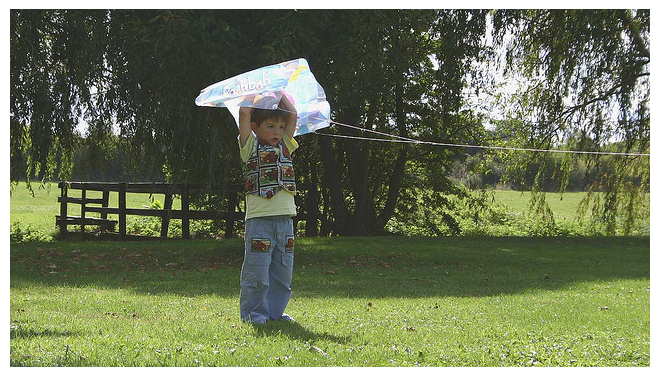

<Figure size 640x480 with 0 Axes>

In [253]:
coco = COCO('./annotations/instances_val2017.json')

img_ids = coco.getImgIds()
idx = random.randint(0, len(img_ids))
img_id, image = image_open(img_ids, idx)

img_annotations = coco.getAnnIds(imgIds = img_ids[idx])
img_annos = coco.loadAnns(img_annotations)

cat_ids = coco.getCatIds()
categories = coco.loadCats(cat_ids)
cate_dict = makecategorydict(categories)

visualize_image(img_annos, cate_dict, img_id, image)

In [262]:
def makebigimage(img_ids, idxes):
    print(idxes)
    plt.figure(figsize=(20, 20))
    
    img_id = [0 for _ in range(len(idxes))]
    for i, idx in enumerate(idxes):
        img_id[i] = str(img_ids[idx]).zfill(12)
        image_path = os.path.join("./val2017/" + f"{img_id[i]}.jpg")
        print(f"idx: {idx}, img_id: {img_id[i]}.jpg")
    
        image = plt.imread(image_path)
        plt.subplot(2, 2, i+1)
        plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

loading annotations into memory...
Done (t=0.73s)
creating index...
index created!
idx: 3537, img_id: 000000349152.jpg


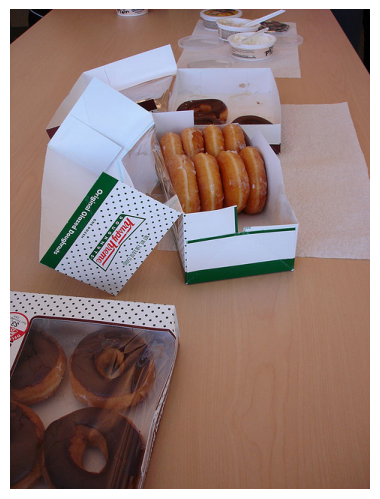

idx: 916, img_id: 000000025393.jpg


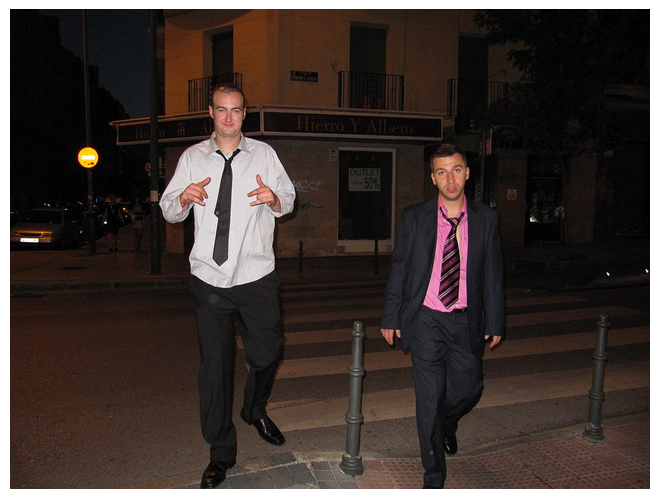

idx: 1634, img_id: 000000284743.jpg


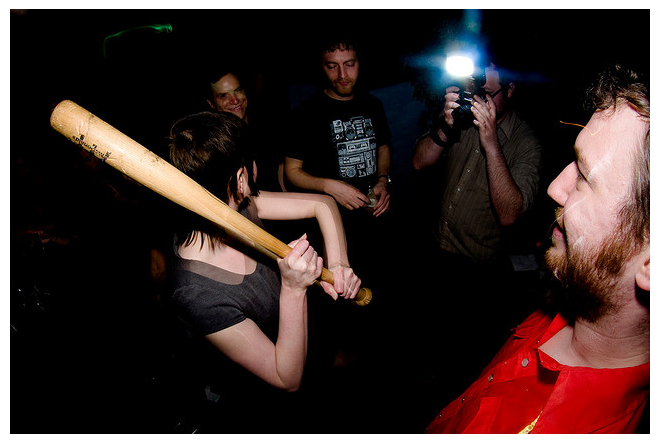

idx: 2020, img_id: 000000357888.jpg


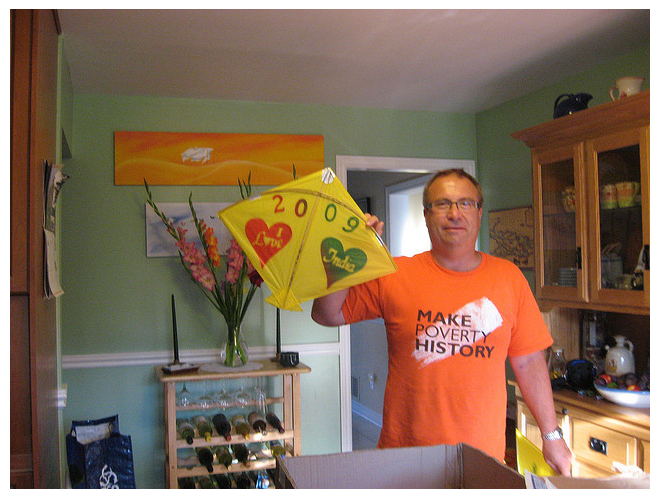

[3537, 916, 1634, 2020]
idx: 3537, img_id: 000000349152.jpg
idx: 916, img_id: 000000025393.jpg
idx: 1634, img_id: 000000284743.jpg
idx: 2020, img_id: 000000357888.jpg


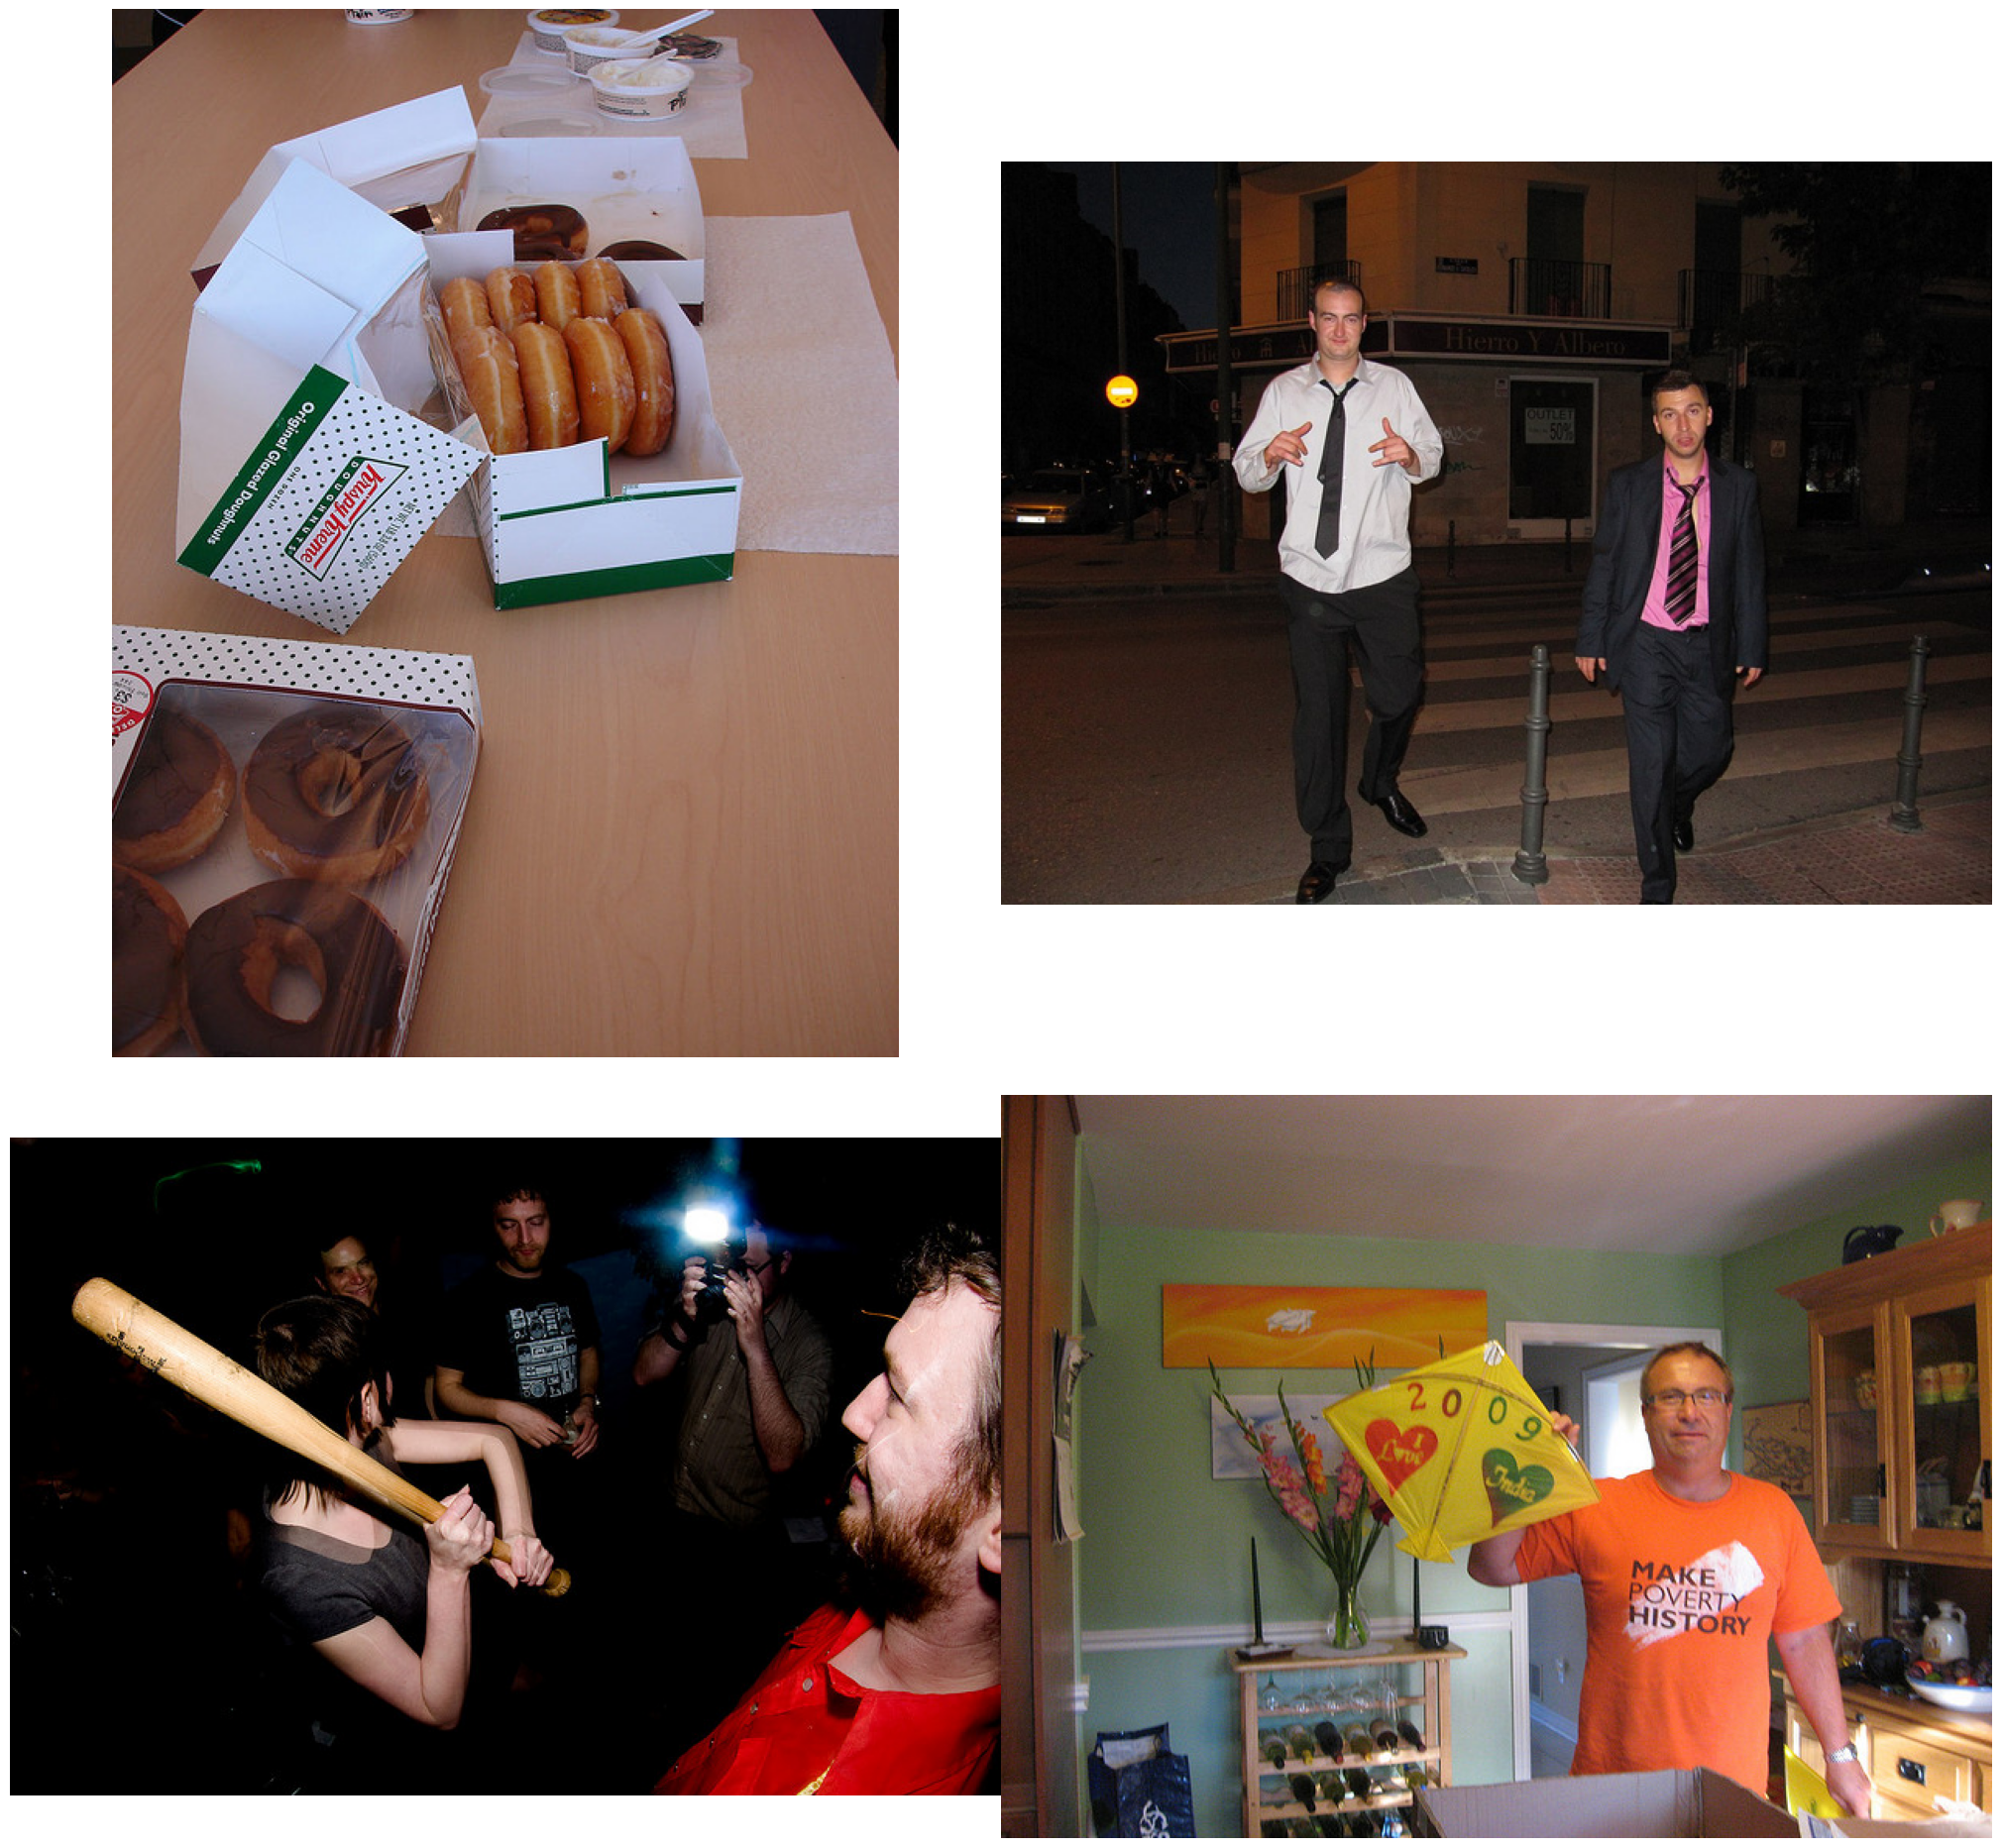

In [263]:
coco = COCO('./annotations/instances_val2017.json')

img_ids = coco.getImgIds()
idxes = random.sample(range(len(img_ids)), 4)

for i in range(4):
    image_open(img_ids, idxes[i])
makebigimage(img_ids, idxes)

In [264]:
import cv2

<function matplotlib.pyplot.show(close=None, block=None)>

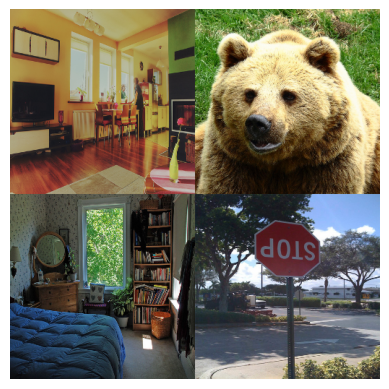

In [291]:
image1 = cv2.imread("./val2017/000000000139.jpg")
image1_rate = [image1.shape[0] / 256, image1.shape[1] / 256]
image1 = cv2.resize(image1, (256, 256))
image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)

image2 = cv2.imread("./val2017/000000000285.jpg")
image2_rate = [image2.shape[0] / 256, image2.shape[1] / 256]
image2 = cv2.resize(image2, (256, 256))
image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)

image3 = cv2.imread("./val2017/000000000632.jpg")
image3_rate = [image3.shape[0] / 256, image3.shape[1] / 256]
image3 = cv2.resize(image3, (256, 256))
image3 = cv2.cvtColor(image3, cv2.COLOR_RGB2BGR)

image4 = cv2.imread("./val2017/000000000724.jpg")
image4_rate = [image4.shape[0] / 256, image4.shape[1] / 256]
image4 = cv2.resize(image4, (256, 256))
image4 = cv2.cvtColor(image4, cv2.COLOR_RGB2BGR)

image5 = np.concatenate((image1, image2), axis=1)
image6 = np.concatenate((image3, image4), axis=1)
image7 = np.concatenate((image5, image6), axis=0)

plt.imshow(image7)
plt.axis('off')
plt.show